# **Laboratorium 7**

# Praktyczne wykorzystanie sieci neuronowych

## Zadanie 1. Klasyfikacja kwiatu irysa

### Rozpoznawanie pojedynczego kwiatu irysa

**Przygotowanie ciągu uczącego**

In [893]:
#wczytanie ciągu uczącego
import pandas as pd
file = 'http://iisi.pcz.pl/~mg/pcz/iris.csv'
dataframe = pd.read_csv(file)
print(dataframe)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [894]:
#unikalne nazwy kwiatów (5 kolumna)
print(dataframe['variety'].unique())

['Setosa' 'Versicolor' 'Virginica']


In [895]:
#stworzenie kolumny 'y' zawierającej 1 dla rodzaju 'Setosa' i 0 dla pozostałych
#w celu nauki przez sieć neuronową
dataframe['y'] = dataframe['variety']
dataframe['y'] = dataframe['y'].replace('Setosa', 1.0)
dataframe['y'] = dataframe['y'].replace('Versicolor', 0.0)
dataframe['y'] = dataframe['y'].replace('Virginica', 0.0)

In [896]:
print(dataframe)

     sepal.length  sepal.width  petal.length  petal.width    variety    y
0             5.1          3.5           1.4          0.2     Setosa  1.0
1             4.9          3.0           1.4          0.2     Setosa  1.0
2             4.7          3.2           1.3          0.2     Setosa  1.0
3             4.6          3.1           1.5          0.2     Setosa  1.0
4             5.0          3.6           1.4          0.2     Setosa  1.0
..            ...          ...           ...          ...        ...  ...
145           6.7          3.0           5.2          2.3  Virginica  0.0
146           6.3          2.5           5.0          1.9  Virginica  0.0
147           6.5          3.0           5.2          2.0  Virginica  0.0
148           6.2          3.4           5.4          2.3  Virginica  0.0
149           5.9          3.0           5.1          1.8  Virginica  0.0

[150 rows x 6 columns]


In [897]:
print(dataframe['y'].unique())

[1. 0.]


**Podział danych na część treningową i testującą**

In [898]:
#część wejściowa X
x = dataframe[ ['sepal.length', 'sepal.width', 'petal.length', 'petal.width'] ]
#wartości oczekiwane, wzorcowe Y
y = dataframe['y']

In [899]:
#podział ciągu proporconalnie na 80% próbek treningowych i 20% testowych
#przy zachowaniu proporcji 0 i 1 w wektorze Y

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

In [900]:
#para x_train, y_train będzie służyć do nauki sieci
#para x_test, y_test będzie służyć do testowania skuteczności sieci

#zamiana danych na tablice numpy
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

**Przygotowanie modelu sieci neuronowej**

In [901]:
#biblioteka Keras (służy do prostego tworzenia, uczenia i modelowania sieci neuronowych)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

M=2 #liczba neuronów w 1 warstwie

model = Sequential()  #sieć wielowarstwowa sekwencyjna (jednokierunkowa)

model.add( Dense(M, activation='relu', input_dim=4) ) #warstwa1
#warstwa Dense (tzw. gęsta - wszystkie sąsiadujące neurony są ze sobą połączone)
# M to liczba neuronów w pierwszej warstwie
# funkcja aktywacji relu (𝑓(𝑥)=𝑚𝑎𝑥(0,𝑥))
# warstwa jest połączona z 4 wejściami (input_dim=4), ponieważ ciąg X ma 4 wejścia

model.add( Dense(1, activation='sigmoid') )           #warstwa2
# składa się z 1 neuronu
# funkcja aktywacji 'sigmoid' (wartości z przedziału od 0 do 1)

model.compile(optimizer="adam", loss="binary_crossentropy")
#optimizer to algorytm uczenia sieci
#loss to funkcja straty
#dla oczekiwanej postaci zero-jedynkowej najbardzie optymalny: 'binary_crossentropy'
#inne np. błąd średniokwadratowy 'mean_squared_error'

**Uczenie sieci**

In [902]:
E=12  #liczba epok uczenia 

#x_train - dane wejściowe
#y_train - dane wyjściowe, oczekiwane, wzorcowe
#epochs - liczba epok uczenia (im więcej tym dokładnie sieć się uczy)
#batch_size - liczba danych, po których następuje modyfikacja wag
#       (im mniej, tym dokładniej się sieć uczy, ale również wolniej)
#verbose(0-brak wyświetlania danych podczas uczenia, 1 lub 2 –wyświetlany postęp uczenia)
#zwracana wartość history: historia zmian wartości ‘loss’, powinna maleć w trakcie uczenia

history = model.fit(x_train, y_train, epochs=E, batch_size=1, verbose=1)

Epoch 1/12
120/120 [==============================] - 0s 793us/step - loss: 0.5061
Epoch 2/12
120/120 [==============================] - 0s 789us/step - loss: 0.4845
Epoch 3/12
120/120 [==============================] - 0s 771us/step - loss: 0.3979
Epoch 4/12
120/120 [==============================] - 0s 755us/step - loss: 0.4087
Epoch 5/12
120/120 [==============================] - 0s 821us/step - loss: 0.3548
Epoch 6/12
120/120 [==============================] - 0s 746us/step - loss: 0.2837
Epoch 7/12
120/120 [==============================] - 0s 780us/step - loss: 0.3032
Epoch 8/12
120/120 [==============================] - 0s 922us/step - loss: 0.2971
Epoch 9/12
120/120 [==============================] - 0s 904us/step - loss: 0.2651
Epoch 10/12
120/120 [==============================] - 0s 810us/step - loss: 0.2706
Epoch 11/12
120/120 [==============================] - 0s 793us/step - loss: 0.2326
Epoch 12/12
120/120 [==============================] - 0s 895us/step - loss: 0.2386


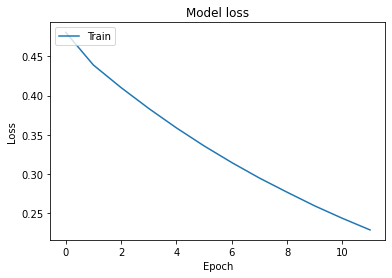

In [903]:
#wykres wartości funkcji celu( wartości 'loss') - powinien dążyć do 0
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')
plt.show()

**Testowanie skuteczności uczenia sieci**

In [904]:
y_result_train = model.predict_classes(x_train)

bledy=0
for i in range(len(y_train)):
  if y_result_train[i] != y_train[i]:
    bledy += 1
    
print("Liczba bledow ciagu treningowego:", bledy)
print("Procent popelnionych bledow: %.2f %%" % (bledy/(len(y_train))*100))
print("Efektywnosc: %.2f %%" % (100-(bledy/(len(y_train))*100)))

Liczba bledow ciagu treningowego: 0
Procent popelnionych bledow: 0.00 %
Efektywnosc: 100.00 %


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [905]:
y_result_train = (model.predict(x_train) > 0.5).astype("int32")

bledy=0
for i in range(len(y_train)):
  if y_result_train[i] != y_train[i]:
    bledy += 1
    
print("Liczba bledow ciagu treningowego:", bledy)
print("Procent popelnionych bledow: %.2f %%" % (bledy/(len(y_train))*100))
print("Efektywnosc: %.2f %%" % (100-(bledy/(len(y_train))*100)))

Liczba bledow ciagu treningowego: 0
Procent popelnionych bledow: 0.00 %
Efektywnosc: 100.00 %


In [906]:
y_result_test = (model.predict(x_test) > 0.5).astype("int32")

bledy=0
for i in range(len(y_test)):
  if y_result_test[i] != y_test[i]:
    bledy += 1
    
print("Liczba bledow ciagu testowego:", bledy)
print("Procent popelnionych bledow: %.2f %%" % (bledy/(len(y_test))*100))
print("Efektywnosc: %.2f %%" % (100-(bledy/(len(y_test))*100)))

Liczba bledow ciagu testowego: 0
Procent popelnionych bledow: 0.00 %
Efektywnosc: 100.00 %


### Zad. 1 - Rozpoznawanie pojedynczego kwiatu irysa, dla różnych sieci neuronowych

**1 Próba** dla sieci:
 - 3 warstwy 
    - w 1 warstwie: 2 neurony
    - w 2 warstwie: 2 neurony
    - w 3 warstwie: 1 neuron

 - 10 epok

In [907]:
#Przygotowanie modelu sieci neuronowej

M=2 #liczba neuronów w 1 warstwie
N=2 #liczba neuronów w 2 warstwie
model = Sequential()  
model.add( Dense(M, activation='relu', input_dim=4) ) #warstwa1
model.add( Dense(N, activation='relu') )              #warstwa2
model.add( Dense(1, activation='sigmoid') )           #warstwa3
model.compile(optimizer="adam", loss="binary_crossentropy")

In [908]:
#Uczenie sieci neuronowej

E=10  #liczba epok uczenia 
history = model.fit(x_train, y_train, epochs=E, batch_size=1, verbose=1)

Epoch 1/10
120/120 [==============================] - 0s 958us/step - loss: 0.9913
Epoch 2/10
120/120 [==============================] - 0s 786us/step - loss: 0.5614
Epoch 3/10
120/120 [==============================] - 0s 964us/step - loss: 0.4661
Epoch 4/10
120/120 [==============================] - 0s 948us/step - loss: 0.4191
Epoch 5/10
120/120 [==============================] - 0s 919us/step - loss: 0.3606
Epoch 6/10
120/120 [==============================] - 0s 921us/step - loss: 0.3285
Epoch 7/10
120/120 [==============================] - 0s 783us/step - loss: 0.3154
Epoch 8/10
120/120 [==============================] - 0s 833us/step - loss: 0.2784
Epoch 9/10
120/120 [==============================] - 0s 1ms/step - loss: 0.2498
Epoch 10/10
120/120 [==============================] - 0s 1ms/step - loss: 0.2395


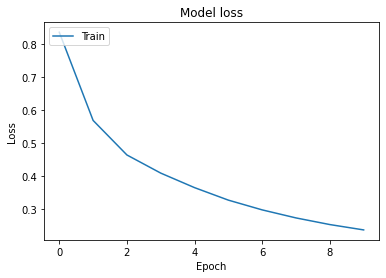

In [909]:
#wykres wartości funkcji celu

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')
plt.show()

In [910]:
#Testowanie skuteczności sieci
y_result_train = (model.predict(x_train) > 0.5).astype("int32")
y_result_test = (model.predict(x_test) > 0.5).astype("int32")

f_train=0
f_test=0

for i in range(len(y_train)):
  if y_result_train[i] != y_train[i]:
    f_train += 1
for i in range(len(y_test)):
  if y_result_test[i] != y_test[i]:
    f_test += 1
  
print("Liczba bledow ciagu treningowego:", f_train)
print("Procent popelnionych bledow: %.2f %%" % (f_train/(len(y_train))*100))
print("Efektywnosc: %.2f %%" % (100-(f_train/(len(y_train))*100)))

print("Liczba bledow ciagu testowego:", f_test)
print("Procent popelnionych bledow: %.2f %%" % (f_test/(len(y_test))*100))
print("Efektywnosc: %.2f %%" % (100-(f_test/(len(y_test))*100)))

Liczba bledow ciagu treningowego: 2
Procent popelnionych bledow: 1.67 %
Efektywnosc: 98.33 %
Liczba bledow ciagu testowego: 1
Procent popelnionych bledow: 3.33 %
Efektywnosc: 96.67 %


**2 Próba** dla sieci: 
 - 3 warstwy 
    - w 1 warstwie: 3 neurony
    - w 2 warstwie: 2 neurony
    - w 3 warstwie: 1 neuron

 - 10 epok

In [911]:
#Przygotowanie modelu sieci neuronowej

M=3 #liczba neuronów w 1 warstwie
N=2 #liczba neuronów w 2 warstwie
model = Sequential()  
model.add( Dense(M, activation='relu', input_dim=4) ) #warstwa1
model.add( Dense(N, activation='relu') )              #warstwa2
model.add( Dense(1, activation='sigmoid') )           #warstwa3
model.compile(optimizer="adam", loss="binary_crossentropy")

In [912]:
#Uczenie sieci neuronowej

E=10  #liczba epok uczenia 
history = model.fit(x_train, y_train, epochs=E, batch_size=1, verbose=1)

Epoch 1/10
120/120 [==============================] - 0s 1ms/step - loss: 0.3411
Epoch 2/10
120/120 [==============================] - 0s 816us/step - loss: 0.2425
Epoch 3/10
120/120 [==============================] - 0s 819us/step - loss: 0.2146
Epoch 4/10
120/120 [==============================] - 0s 815us/step - loss: 0.2301
Epoch 5/10
120/120 [==============================] - 0s 800us/step - loss: 0.1930
Epoch 6/10
120/120 [==============================] - 0s 822us/step - loss: 0.1883
Epoch 7/10
120/120 [==============================] - 0s 957us/step - loss: 0.2051
Epoch 8/10
120/120 [==============================] - 0s 929us/step - loss: 0.1447
Epoch 9/10
120/120 [==============================] - 0s 920us/step - loss: 0.1993
Epoch 10/10
120/120 [==============================] - 0s 842us/step - loss: 0.1538


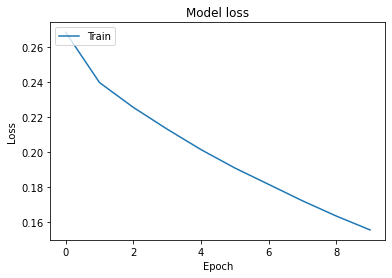

In [913]:
#wykres wartości funkcji celu

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')
plt.show()

In [914]:
#Testowanie skuteczności sieci
y_result_train = (model.predict(x_train) > 0.5).astype("int32")
y_result_test = (model.predict(x_test) > 0.5).astype("int32")

f_train=0
f_test=0

for i in range(len(y_train)):
  if y_result_train[i] != y_train[i]:
    f_train += 1
for i in range(len(y_test)):
  if y_result_test[i] != y_test[i]:
    f_test += 1
  
print("Liczba bledow ciagu treningowego:", f_train)
print("Procent popelnionych bledow: %.2f %%" % (f_train/(len(y_train))*100))
print("Efektywnosc: %.2f %%" % (100-(f_train/(len(y_train))*100)))

print("Liczba bledow ciagu testowego:", f_test)
print("Procent popelnionych bledow: %.2f %%" % (f_test/(len(y_test))*100))
print("Efektywnosc: %.2f %%" % (100-(f_test/(len(y_test))*100)))

Liczba bledow ciagu treningowego: 0
Procent popelnionych bledow: 0.00 %
Efektywnosc: 100.00 %
Liczba bledow ciagu testowego: 0
Procent popelnionych bledow: 0.00 %
Efektywnosc: 100.00 %


**3 Próba** dla sieci: 
 - 3 warstwy 
    - w 1 warstwie: 3 neurony
    - w 2 warstwie: 3 neurony
    - w 3 warstwie: 1 neuron

 - 10 epok

In [915]:
#Przygotowanie modelu sieci neuronowej

M=3 #liczba neuronów w 1 warstwie
N=3 #liczba neuronów w 2 warstwie
model = Sequential()  
model.add( Dense(M, activation='relu', input_dim=4) ) #warstwa1
model.add( Dense(N, activation='relu') )              #warstwa2
model.add( Dense(1, activation='sigmoid') )           #warstwa3
model.compile(optimizer="adam", loss="binary_crossentropy")

In [916]:
#Uczenie sieci neuronowej

E=10  #liczba epok uczenia 
history = model.fit(x_train, y_train, epochs=E, batch_size=1, verbose=1)

Epoch 1/10
120/120 [==============================] - 0s 891us/step - loss: 0.6918
Epoch 2/10
120/120 [==============================] - 0s 839us/step - loss: 0.6875
Epoch 3/10
120/120 [==============================] - 0s 833us/step - loss: 0.6781
Epoch 4/10
120/120 [==============================] - 0s 887us/step - loss: 0.6730
Epoch 5/10
120/120 [==============================] - 0s 965us/step - loss: 0.6708
Epoch 6/10
120/120 [==============================] - 0s 944us/step - loss: 0.6588
Epoch 7/10
120/120 [==============================] - 0s 1ms/step - loss: 0.6461
Epoch 8/10
120/120 [==============================] - 0s 970us/step - loss: 0.6636
Epoch 9/10
120/120 [==============================] - 0s 826us/step - loss: 0.6591
Epoch 10/10
120/120 [==============================] - 0s 914us/step - loss: 0.6577


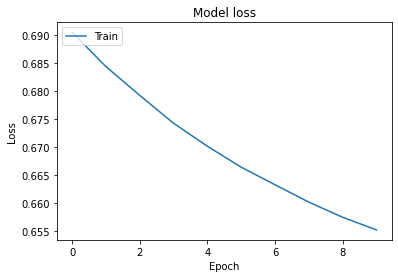

In [917]:
#wykres wartości funkcji celu

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')
plt.show()

In [918]:
#Testowanie skuteczności sieci
y_result_train = (model.predict(x_train) > 0.5).astype("int32")
y_result_test = (model.predict(x_test) > 0.5).astype("int32")

f_train=0
f_test=0

for i in range(len(y_train)):
  if y_result_train[i] != y_train[i]:
    f_train += 1
for i in range(len(y_test)):
  if y_result_test[i] != y_test[i]:
    f_test += 1
  
print("Liczba bledow ciagu treningowego:", f_train)
print("Procent popelnionych bledow: %.2f %%" % (f_train/(len(y_train))*100))
print("Efektywnosc: %.2f %%" % (100-(f_train/(len(y_train))*100)))

print("Liczba bledow ciagu testowego:", f_test)
print("Procent popelnionych bledow: %.2f %%" % (f_test/(len(y_test))*100))
print("Efektywnosc: %.2f %%" % (100-(f_test/(len(y_test))*100)))

Liczba bledow ciagu treningowego: 40
Procent popelnionych bledow: 33.33 %
Efektywnosc: 66.67 %
Liczba bledow ciagu testowego: 10
Procent popelnionych bledow: 33.33 %
Efektywnosc: 66.67 %


**4 Próba** dla sieci: 
 - 3 warstwy 
    - w 1 warstwie: 4 neurony
    - w 2 warstwie: 3 neurony
    - w 3 warstwie: 1 neuron

 - 10 epok

In [927]:
#Przygotowanie modelu sieci neuronowej

M=4 #liczba neuronów w 1 warstwie
N=3 #liczba neuronów w 2 warstwie
model = Sequential()  
model.add( Dense(M, activation='relu', input_dim=4) ) #warstwa1
model.add( Dense(N, activation='relu') )              #warstwa2
model.add( Dense(1, activation='sigmoid') )           #warstwa3
model.compile(optimizer="adam", loss="binary_crossentropy")

In [928]:
#Uczenie sieci neuronowej

E=10  #liczba epok uczenia 
history = model.fit(x_train, y_train, epochs=E, batch_size=1, verbose=1)

Epoch 1/10
120/120 [==============================] - 0s 964us/step - loss: 0.6913
Epoch 2/10
120/120 [==============================] - 0s 984us/step - loss: 0.6828
Epoch 3/10
120/120 [==============================] - 0s 925us/step - loss: 0.6831
Epoch 4/10
120/120 [==============================] - 0s 853us/step - loss: 0.6790
Epoch 5/10
120/120 [==============================] - 0s 908us/step - loss: 0.6715
Epoch 6/10
120/120 [==============================] - 0s 871us/step - loss: 0.6673
Epoch 7/10
120/120 [==============================] - 0s 1ms/step - loss: 0.6680
Epoch 8/10
120/120 [==============================] - 0s 946us/step - loss: 0.6668
Epoch 9/10
120/120 [==============================] - 0s 918us/step - loss: 0.6344
Epoch 10/10
120/120 [==============================] - 0s 1ms/step - loss: 0.6684


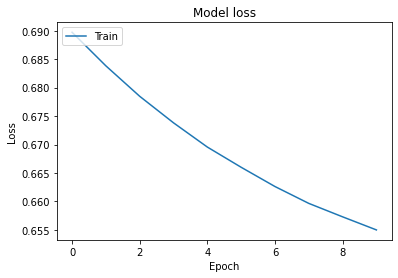

In [929]:
#wykres wartości funkcji celu

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')
plt.show()

In [930]:
#Testowanie skuteczności sieci
y_result_train = (model.predict(x_train) > 0.5).astype("int32")
y_result_test = (model.predict(x_test) > 0.5).astype("int32")

f_train=0
f_test=0

for i in range(len(y_train)):
  if y_result_train[i] != y_train[i]:
    f_train += 1
for i in range(len(y_test)):
  if y_result_test[i] != y_test[i]:
    f_test += 1
  
print("Liczba bledow ciagu treningowego:", f_train)
print("Procent popelnionych bledow: %.2f %%" % (f_train/(len(y_train))*100))
print("Efektywnosc: %.2f %%" % (100-(f_train/(len(y_train))*100)))

print("Liczba bledow ciagu testowego:", f_test)
print("Procent popelnionych bledow: %.2f %%" % (f_test/(len(y_test))*100))
print("Efektywnosc: %.2f %%" % (100-(f_test/(len(y_test))*100)))

Liczba bledow ciagu treningowego: 40
Procent popelnionych bledow: 33.33 %
Efektywnosc: 66.67 %
Liczba bledow ciagu testowego: 10
Procent popelnionych bledow: 33.33 %
Efektywnosc: 66.67 %


**5 Próba** dla sieci: 
 - 3 warstwy 
    - w 1 warstwie: 4 neurony
    - w 2 warstwie: 4 neurony
    - w 3 warstwie: 1 neuron

 - 10 epok

In [937]:
#Przygotowanie modelu sieci neuronowej

M=4 #liczba neuronów w 1 warstwie
N=4 #liczba neuronów w 2 warstwie
model = Sequential()  
model.add( Dense(M, activation='relu', input_dim=4) ) #warstwa1
model.add( Dense(N, activation='relu') )              #warstwa2
model.add( Dense(1, activation='sigmoid') )           #warstwa3
model.compile(optimizer="adam", loss="binary_crossentropy")

In [938]:
#Uczenie sieci neuronowej

E=10  #liczba epok uczenia 
history = model.fit(x_train, y_train, epochs=E, batch_size=1, verbose=1)

Epoch 1/10
120/120 [==============================] - 0s 825us/step - loss: 0.5337
Epoch 2/10
120/120 [==============================] - 0s 787us/step - loss: 0.3957
Epoch 3/10
120/120 [==============================] - 0s 929us/step - loss: 0.3061
Epoch 4/10
120/120 [==============================] - 0s 813us/step - loss: 0.2500
Epoch 5/10
120/120 [==============================] - 0s 784us/step - loss: 0.1733
Epoch 6/10
120/120 [==============================] - 0s 834us/step - loss: 0.1258
Epoch 7/10
120/120 [==============================] - 0s 792us/step - loss: 0.1039
Epoch 8/10
120/120 [==============================] - 0s 977us/step - loss: 0.0885
Epoch 9/10
120/120 [==============================] - 0s 885us/step - loss: 0.0534
Epoch 10/10
120/120 [==============================] - 0s 905us/step - loss: 0.0514


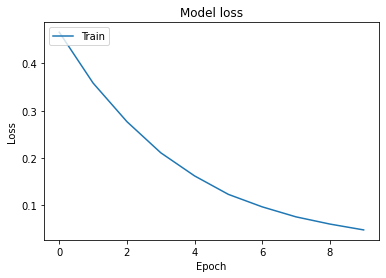

In [939]:
#wykres wartości funkcji celu




plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')
plt.show()

In [940]:
#Testowanie skuteczności sieci
y_result_train = (model.predict(x_train) > 0.5).astype("int32")
y_result_test = (model.predict(x_test) > 0.5).astype("int32")

f_train=0
f_test=0

for i in range(len(y_train)):
  if y_result_train[i] != y_train[i]:
    f_train += 1
for i in range(len(y_test)):
  if y_result_test[i] != y_test[i]:
    f_test += 1
  
print("Liczba bledow ciagu treningowego:", f_train)
print("Procent popelnionych bledow: %.2f %%" % (f_train/(len(y_train))*100))
print("Efektywnosc: %.2f %%" % (100-(f_train/(len(y_train))*100)))

print("Liczba bledow ciagu testowego:", f_test)
print("Procent popelnionych bledow: %.2f %%" % (f_test/(len(y_test))*100))
print("Efektywnosc: %.2f %%" % (100-(f_test/(len(y_test))*100)))

Liczba bledow ciagu treningowego: 0
Procent popelnionych bledow: 0.00 %
Efektywnosc: 100.00 %
Liczba bledow ciagu testowego: 0
Procent popelnionych bledow: 0.00 %
Efektywnosc: 100.00 %


### Zad. 2 - Rozpoznawanie pojedynczego kwiatu irysa, pozostałe kwiaty irysa

**Versicolor**

In [941]:
#stworzenie kolumny 'y' zawierającej 1 dla rodzaju 'Versicolor' i 0 dla pozostałych
#w celu nauki przez sieć neuronową
dataframe['y'] = dataframe['variety']
dataframe['y'] = dataframe['y'].replace('Setosa', 0.0)
dataframe['y'] = dataframe['y'].replace('Versicolor', 1.0)
dataframe['y'] = dataframe['y'].replace('Virginica', 0.0)

In [942]:
print(dataframe)

     sepal.length  sepal.width  petal.length  petal.width    variety    y
0             5.1          3.5           1.4          0.2     Setosa  0.0
1             4.9          3.0           1.4          0.2     Setosa  0.0
2             4.7          3.2           1.3          0.2     Setosa  0.0
3             4.6          3.1           1.5          0.2     Setosa  0.0
4             5.0          3.6           1.4          0.2     Setosa  0.0
..            ...          ...           ...          ...        ...  ...
145           6.7          3.0           5.2          2.3  Virginica  0.0
146           6.3          2.5           5.0          1.9  Virginica  0.0
147           6.5          3.0           5.2          2.0  Virginica  0.0
148           6.2          3.4           5.4          2.3  Virginica  0.0
149           5.9          3.0           5.1          1.8  Virginica  0.0

[150 rows x 6 columns]


In [943]:
#część wejściowa X
x = dataframe[ ['sepal.length', 'sepal.width', 'petal.length', 'petal.width'] ]
#wartości oczekiwane, wzorcowe Y
y = dataframe['y']

In [944]:
#podział ciągu proporconalnie na 80% próbek treningowych i 20% testowych
#przy zachowaniu proporcji 0 i 1 w wektorze Y
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

In [945]:
#zamiana danych na tablice numpy
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

 - 3 warstwy 
    - w 1 warstwie: 6 neurony
    - w 2 warstwie: 4 neurony
    - w 3 warstwie: 1 neuron

 - 35 epok

In [956]:
#Przygotowanie modelu sieci neuronowej

M=6 #liczba neuronów w 1 warstwie
N=4 #liczba neuronów w 2 warstwie
model = Sequential()  
model.add( Dense(M, activation='relu', input_dim=4) ) #warstwa1
model.add( Dense(N, activation='relu') )              #warstwa2
model.add( Dense(1, activation='sigmoid') )           #warstwa3
model.compile(optimizer="adam", loss="binary_crossentropy")

In [957]:
#Uczenie sieci neuronowej

E=35  #liczba epok uczenia 
history = model.fit(x_train, y_train, epochs=E, batch_size=1, verbose=1)

Epoch 1/35
120/120 [==============================] - 0s 955us/step - loss: 0.7916
Epoch 2/35
120/120 [==============================] - 0s 955us/step - loss: 0.5983
Epoch 3/35
120/120 [==============================] - 0s 989us/step - loss: 0.6341
Epoch 4/35
120/120 [==============================] - 0s 824us/step - loss: 0.6003
Epoch 5/35
120/120 [==============================] - 0s 908us/step - loss: 0.6010
Epoch 6/35
120/120 [==============================] - 0s 1ms/step - loss: 0.5971
Epoch 7/35
120/120 [==============================] - 0s 823us/step - loss: 0.6032
Epoch 8/35
120/120 [==============================] - 0s 974us/step - loss: 0.6106
Epoch 9/35
120/120 [==============================] - 0s 893us/step - loss: 0.5681
Epoch 10/35
120/120 [==============================] - 0s 929us/step - loss: 0.5959
Epoch 11/35
120/120 [==============================] - 0s 932us/step - loss: 0.5627
Epoch 12/35
120/120 [==============================] - 0s 903us/step - loss: 0.5553
Epo

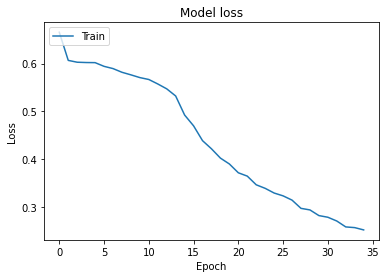

In [958]:
#wykres wartości funkcji celu
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')
plt.show()

In [959]:
#Testowanie skuteczności sieci
y_result_train = (model.predict(x_train) > 0.5).astype("int32")
y_result_test = (model.predict(x_test) > 0.5).astype("int32")

f_train=0
f_test=0
for i in range(len(y_train)):
  if y_result_train[i] != y_train[i]:
    f_train += 1
for i in range(len(y_test)):
  if y_result_test[i] != y_test[i]:
    f_test += 1
  
print("Liczba bledow ciagu treningowego:", f_train)
print("Procent popelnionych bledow: %.2f %%" % (f_train/(len(y_train))*100))
print("Efektywnosc: %.2f %%" % (100-(f_train/(len(y_train))*100)))

print("Liczba bledow ciagu testowego:", f_test)
print("Procent popelnionych bledow: %.2f %%" % (f_test/(len(y_test))*100))
print("Efektywnosc: %.2f %%" % (100-(f_test/(len(y_test))*100)))

Liczba bledow ciagu treningowego: 5
Procent popelnionych bledow: 4.17 %
Efektywnosc: 95.83 %
Liczba bledow ciagu testowego: 1
Procent popelnionych bledow: 3.33 %
Efektywnosc: 96.67 %


**Virginica**

In [960]:
#stworzenie kolumny 'y' zawierającej 1 dla rodzaju 'Versicolor' i 0 dla pozostałych
#w celu nauki przez sieć neuronową
dataframe['y'] = dataframe['variety']
dataframe['y'] = dataframe['y'].replace('Setosa', 0.0)
dataframe['y'] = dataframe['y'].replace('Versicolor', 0.0)
dataframe['y'] = dataframe['y'].replace('Virginica', 1.0)

In [961]:
print(dataframe)

     sepal.length  sepal.width  petal.length  petal.width    variety    y
0             5.1          3.5           1.4          0.2     Setosa  0.0
1             4.9          3.0           1.4          0.2     Setosa  0.0
2             4.7          3.2           1.3          0.2     Setosa  0.0
3             4.6          3.1           1.5          0.2     Setosa  0.0
4             5.0          3.6           1.4          0.2     Setosa  0.0
..            ...          ...           ...          ...        ...  ...
145           6.7          3.0           5.2          2.3  Virginica  1.0
146           6.3          2.5           5.0          1.9  Virginica  1.0
147           6.5          3.0           5.2          2.0  Virginica  1.0
148           6.2          3.4           5.4          2.3  Virginica  1.0
149           5.9          3.0           5.1          1.8  Virginica  1.0

[150 rows x 6 columns]


In [962]:
#część wejściowa X
x = dataframe[ ['sepal.length', 'sepal.width', 'petal.length', 'petal.width'] ]
#wartości oczekiwane, wzorcowe Y
y = dataframe['y']

In [963]:
#podział ciągu proporconalnie na 80% próbek treningowych i 20% testowych
#przy zachowaniu proporcji 0 i 1 w wektorze Y
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

In [964]:
#zamiana danych na tablice numpy
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

 - 3 warstwy 
    - w 1 warstwie: 6 neurony
    - w 2 warstwie: 4 neurony
    - w 3 warstwie: 1 neuron

 - 35 epok

In [965]:
#Przygotowanie modelu sieci neuronowej

M=6 #liczba neuronów w 1 warstwie
N=4 #liczba neuronów w 2 warstwie
model = Sequential()  
model.add( Dense(M, activation='relu', input_dim=4) ) #warstwa1
model.add( Dense(N, activation='relu') )              #warstwa2
model.add( Dense(1, activation='sigmoid') )           #warstwa3
model.compile(optimizer="adam", loss="binary_crossentropy")

In [966]:
#Uczenie sieci neuronowej

E=35  #liczba epok uczenia 
history = model.fit(x_train, y_train, epochs=E, batch_size=1, verbose=1)

Epoch 1/35
120/120 [==============================] - 0s 1ms/step - loss: 0.7777
Epoch 2/35
120/120 [==============================] - 0s 1ms/step - loss: 0.6569
Epoch 3/35
120/120 [==============================] - 0s 972us/step - loss: 0.5998
Epoch 4/35
120/120 [==============================] - 0s 986us/step - loss: 0.4762
Epoch 5/35
120/120 [==============================] - 0s 1ms/step - loss: 0.4215
Epoch 6/35
120/120 [==============================] - 0s 1ms/step - loss: 0.3892
Epoch 7/35
120/120 [==============================] - 0s 978us/step - loss: 0.3544
Epoch 8/35
120/120 [==============================] - 0s 967us/step - loss: 0.3677
Epoch 9/35
120/120 [==============================] - 0s 1ms/step - loss: 0.3110
Epoch 10/35
120/120 [==============================] - 0s 1ms/step - loss: 0.3084
Epoch 11/35
120/120 [==============================] - 0s 1ms/step - loss: 0.2815
Epoch 12/35
120/120 [==============================] - 0s 1ms/step - loss: 0.2575
Epoch 13/35
120/1

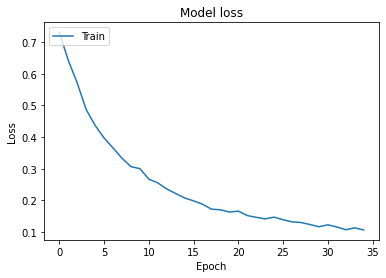

In [967]:
#wykres wartości funkcji celu
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')
plt.show()

In [968]:
#Testowanie skuteczności sieci
y_result_train = (model.predict(x_train) > 0.5).astype("int32")
y_result_test = (model.predict(x_test) > 0.5).astype("int32")

f_train=0
f_test=0
for i in range(len(y_train)):
  if y_result_train[i] != y_train[i]:
    f_train += 1
for i in range(len(y_test)):
  if y_result_test[i] != y_test[i]:
    f_test += 1
  
print("Liczba bledow ciagu treningowego:", f_train)
print("Procent popelnionych bledow: %.2f %%" % (f_train/(len(y_train))*100))
print("Efektywnosc: %.2f %%" % (100-(f_train/(len(y_train))*100)))

print("Liczba bledow ciagu testowego:", f_test)
print("Procent popelnionych bledow: %.2f %%" % (f_test/(len(y_test))*100))
print("Efektywnosc: %.2f %%" % (100-(f_test/(len(y_test))*100)))

Liczba bledow ciagu treningowego: 6
Procent popelnionych bledow: 5.00 %
Efektywnosc: 95.00 %
Liczba bledow ciagu testowego: 1
Procent popelnionych bledow: 3.33 %
Efektywnosc: 96.67 %


### Zad. 3 - Rozpoznawanie wszystkich kwiatów irysa na raz 

In [969]:
#stworzenie kolumny 'y' zawierającej 1 dla rodzaju 'Versicolor' i 0 dla pozostałych
#w celu nauki przez sieć neuronową (sieć neuronowa będzie mieć 3 wyjścia)
#przygotowanie 3 kolumn y, y2, y3
#y oznacza  'Setosa'
#y2 oznacza 'Versicolor'
#y3 oznacza 'Virginica'
dataframe['y'] = dataframe['variety']
dataframe['y'] = dataframe['y'].replace('Setosa', 1.0)
dataframe['y'] = dataframe['y'].replace('Versicolor', 0.0)
dataframe['y'] = dataframe['y'].replace('Virginica', 0.0)

dataframe['y2'] = dataframe['variety']
dataframe['y2'] = dataframe['y2'].replace('Setosa', 0.0)
dataframe['y2'] = dataframe['y2'].replace('Versicolor', 1.0)
dataframe['y2'] = dataframe['y2'].replace('Virginica', 0.0)

dataframe['y3'] = dataframe['variety']
dataframe['y3'] = dataframe['y3'].replace('Setosa', 0.0)
dataframe['y3'] = dataframe['y3'].replace('Versicolor', 0.0)
dataframe['y3'] = dataframe['y3'].replace('Virginica', 1.0)

In [970]:
print(dataframe)

     sepal.length  sepal.width  petal.length  ...    y   y2   y3
0             5.1          3.5           1.4  ...  1.0  0.0  0.0
1             4.9          3.0           1.4  ...  1.0  0.0  0.0
2             4.7          3.2           1.3  ...  1.0  0.0  0.0
3             4.6          3.1           1.5  ...  1.0  0.0  0.0
4             5.0          3.6           1.4  ...  1.0  0.0  0.0
..            ...          ...           ...  ...  ...  ...  ...
145           6.7          3.0           5.2  ...  0.0  0.0  1.0
146           6.3          2.5           5.0  ...  0.0  0.0  1.0
147           6.5          3.0           5.2  ...  0.0  0.0  1.0
148           6.2          3.4           5.4  ...  0.0  0.0  1.0
149           5.9          3.0           5.1  ...  0.0  0.0  1.0

[150 rows x 8 columns]


In [971]:
#część wejściowa X
x = dataframe[ ['sepal.length', 'sepal.width', 'petal.length', 'petal.width'] ]
#wartości oczekiwane, wzorcowe Y
y = dataframe[ ['y', 'y2', 'y3'] ]    #3 wyjścia - 3 wartości oczekiwane

In [972]:
#podział ciągu proporconalnie na 80% próbek treningowych i 20% testowych
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

In [973]:
#zamiana danych na tablice numpy
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

 - 3 warstwy 
    - w 1 warstwie: 6 neurony
    - w 2 warstwie: 4 neurony
    - w 3 warstwie: 3 neurony - 3 wartości wyjściowe

 - 35 epok

In [974]:
#Przygotowanie modelu sieci neuronowej

M=6 #liczba neuronów w 1 warstwie
N=4 #liczba neuronów w 2 warstwie
model = Sequential()  
model.add( Dense(M, activation='relu', input_dim=4) ) #warstwa1
model.add( Dense(N, activation='relu') )              #warstwa2
model.add( Dense(3, activation='sigmoid') )           #warstwa3 <- 3 neurony
model.compile(optimizer="adam", loss="binary_crossentropy")

In [975]:
#Uczenie sieci neuronowej

E=35  #liczba epok uczenia 
history = model.fit(x_train, y_train, epochs=E, batch_size=1, verbose=1)

Epoch 1/35
120/120 [==============================] - 0s 841us/step - loss: 1.1958
Epoch 2/35
120/120 [==============================] - 0s 875us/step - loss: 0.8173
Epoch 3/35
120/120 [==============================] - 0s 825us/step - loss: 0.5570
Epoch 4/35
120/120 [==============================] - 0s 969us/step - loss: 0.5332
Epoch 5/35
120/120 [==============================] - 0s 821us/step - loss: 0.5092
Epoch 6/35
120/120 [==============================] - 0s 888us/step - loss: 0.4635
Epoch 7/35
120/120 [==============================] - 0s 924us/step - loss: 0.4122
Epoch 8/35
120/120 [==============================] - 0s 900us/step - loss: 0.4187
Epoch 9/35
120/120 [==============================] - 0s 958us/step - loss: 0.4352
Epoch 10/35
120/120 [==============================] - 0s 918us/step - loss: 0.3689
Epoch 11/35
120/120 [==============================] - 0s 937us/step - loss: 0.3493
Epoch 12/35
120/120 [==============================] - 0s 953us/step - loss: 0.3436
E

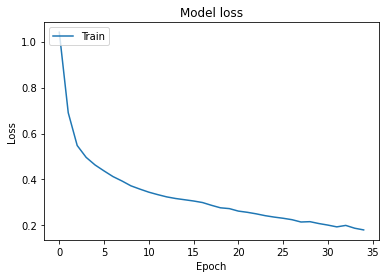

In [976]:





#wykres wartości funkcji celu
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')
plt.show()

In [977]:
#Testowanie skuteczności sieci
y_result_train = (model.predict(x_train) > 0.5).astype("int32")
y_result_test = (model.predict(x_test) > 0.5).astype("int32")

f_train=0

f_test=0

for i in range(len(y_train)):   #jeśli którakolwiek z 3 wartości wyjściowych jest
  if y_result_train[i][0] != y_train[i][0]: # niepoprawna to f_train += 1
    f_train += 1
  elif y_result_train[i][1] != y_train[i][1]:
    f_train += 1
  elif y_result_train[i][2] != y_train[i][2]:
    f_train += 1


for i in range(len(y_test)):    #jeśli którakolwiek z 3 wartości wyjściowych jest
  if y_result_test[i][0] != y_test[i][0]:   # niepoprawna to f_test += 1
    f_test += 1
  elif y_result_test[i][1] != y_test[i][1]:
    f_test += 1
  elif y_result_test[i][2] != y_test[i][2]:
    f_test += 1
  
print("Liczba bledow ciagu treningowego:", f_train)
print("Procent popelnionych bledow: %.2f %%" % (f_train/(len(y_train))*100))
print("Efektywnosc: %.2f %%" % (100-(f_train/(len(y_train))*100)))

print("Liczba bledow ciagu testowego:", f_test)
print("Procent popelnionych bledow: %.2f %%" % (f_test/(len(y_test))*100))
print("Efektywnosc: %.2f %%" % (100-(f_test/(len(y_test))*100)))

Liczba bledow ciagu treningowego: 6
Procent popelnionych bledow: 5.00 %
Efektywnosc: 95.00 %
Liczba bledow ciagu testowego: 0
Procent popelnionych bledow: 0.00 %
Efektywnosc: 100.00 %


## Zadanie 2. Klasyfikacja autentycznych danych medycznych

In [978]:
#wczytanie ciągu uczącego
import pandas as pd
file = 'http://iisi.pcz.pl/~mg/pcz/pid.csv'
dataframe = pd.read_csv(file)
print(dataframe)

     pregnancies  glucose  ...  age  class
0              6      148  ...   50      1
1              1       85  ...   31      0
2              8      183  ...   32      1
3              1       89  ...   21      0
4              0      137  ...   33      1
..           ...      ...  ...  ...    ...
763           10      101  ...   63      0
764            2      122  ...   27      0
765            5      121  ...   30      0
766            1      126  ...   47      1
767            1       93  ...   23      0

[768 rows x 9 columns]


In [979]:
#class (9 kolumna)
# 0 - osoba zdrowa
# 1 - osoba chora na cukrzyce
print(dataframe['class'].unique())

[1 0]


In [980]:
dataframe.columns #nazwy kolumn

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_function', 'age', 'class'],
      dtype='object')

In [981]:
#część wejściowa X
x = dataframe[ ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_function', 'age'] ]

y = dataframe['class']  #wartości oczekiwane Y

In [982]:
#podział ciągu proporconalnie na 80% próbek treningowych i 20% testowych
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

In [983]:
#zamiana danych na tablice numpy
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

 - 3 warstwy 
    - w 1 warstwie: 16 neuronów
    - w 2 warstwie: 8 neuronów
    - w 3 warstwie: 1 neuron

 - 800 epok
 - batch_size=80

In [992]:
#Przygotowanie modelu sieci neuronowej

M=16 #liczba neuronów w 1 warstwie
N=8 #liczba neuronów w 2 warstwie
# input_dim=8 <- 8 wartości wejściowych
model = Sequential()  
model.add( Dense(M, activation='relu', input_dim=8) ) #warstwa1
model.add( Dense(N, activation='sigmoid') )           #warstwa2
model.add( Dense(1, activation='sigmoid') )           #warstwa3
model.compile(optimizer="adam", loss="binary_crossentropy")

In [993]:
#Uczenie sieci neuronowej

E=800  #liczba epok uczenia 
history = model.fit(x_train, y_train, epochs=E, batch_size=80, verbose=0)

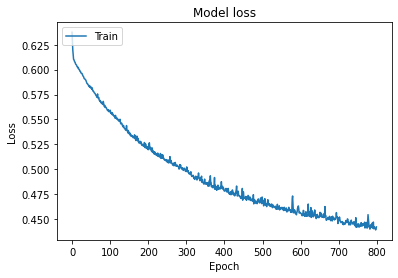

In [994]:
#wykres wartości funkcji celu
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')
plt.show()

In [995]:
#Testowanie skuteczności sieci
y_result_train = (model.predict(x_train) > 0.5).astype("int32")
y_result_test = (model.predict(x_test) > 0.5).astype("int32")

f_train=0
f_test=0
for i in range(len(y_train)):
  if y_result_train[i] != y_train[i]:
    f_train += 1
for i in range(len(y_test)):
  if y_result_test[i] != y_test[i]:
    f_test += 1
  
print("Liczba bledow ciagu treningowego:", f_train)
print("Procent popelnionych bledow: %.2f %%" % (f_train/(len(y_train))*100))
print("Efektywnosc: %.2f %%" % (100-(f_train/(len(y_train))*100)))

print("Liczba bledow ciagu testowego:", f_test)
print("Procent popelnionych bledow: %.2f %%" % (f_test/(len(y_test))*100))
print("Efektywnosc: %.2f %%" % (100-(f_test/(len(y_test))*100)))

Liczba bledow ciagu treningowego: 117
Procent popelnionych bledow: 19.06 %
Efektywnosc: 80.94 %
Liczba bledow ciagu testowego: 45
Procent popelnionych bledow: 29.22 %
Efektywnosc: 70.78 %


**2 próba**
 - 4 warstwy 
    - w 1 warstwie: 24 neuronów
    - w 2 warstwie: 12 neuronów
    - w 3 warstwie: 6 neuronów
    - w 4 warstwie: 1 neuron

 - 1000 epok
 - batch_size=40

In [1044]:
#Przygotowanie modelu sieci neuronowej

M=24 #liczba neuronów w 1 warstwie
N=12 #liczba neuronów w 2 warstwie
B=6
# input_dim=8 <- 8 wartości wejściowych
model = Sequential()  
model.add( Dense(M, activation='sigmoid', input_dim=8) ) #warstwa1
model.add( Dense(N, activation='relu') )           #warstwa2
model.add( Dense(B, activation='relu') )           #warstwa3
model.add( Dense(1, activation='sigmoid') )           #warstwa4
model.compile(optimizer="adam", loss="binary_crossentropy")

In [1045]:
#Uczenie sieci neuronowej

E=1000  #liczba epok uczenia 
history = model.fit(x_train, y_train, epochs=E, batch_size=40, verbose=0)

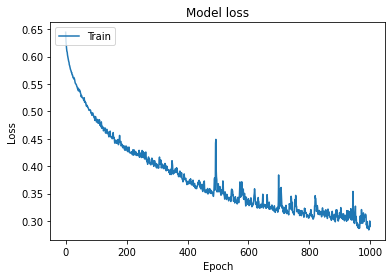

In [1046]:
#wykres wartości funkcji celu
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')
plt.show()

In [1047]:
#Testowanie skuteczności sieci
y_result_train = (model.predict(x_train) > 0.5).astype("int32")
y_result_test = (model.predict(x_test) > 0.5).astype("int32")

f_train=0
f_test=0
for i in range(len(y_train)):
  if y_result_train[i] != y_train[i]:
    f_train += 1
for i in range(len(y_test)):
  if y_result_test[i] != y_test[i]:
    f_test += 1
  
print("Liczba bledow ciagu treningowego:", f_train)
print("Procent popelnionych bledow: %.2f %%" % (f_train/(len(y_train))*100))
print("Efektywnosc: %.2f %%" % (100-(f_train/(len(y_train))*100)))

print("Liczba bledow ciagu testowego:", f_test)
print("Procent popelnionych bledow: %.2f %%" % (f_test/(len(y_test))*100))
print("Efektywnosc: %.2f %%" % (100-(f_test/(len(y_test))*100)))

Liczba bledow ciagu treningowego: 69
Procent popelnionych bledow: 11.24 %
Efektywnosc: 88.76 %
Liczba bledow ciagu testowego: 43
Procent popelnionych bledow: 27.92 %
Efektywnosc: 72.08 %
